#   Model Development
##  IBM Data Science Certification Course Project 
In data analytics, we often use Model Development to help us predict future observations from the data we have. <p> This project attempts to create a prediction model for the price of cars.  <p>The dataset used contains various features of cars that can be examined, modelled, trained and used to make predictions. <p>
### Steps : <p>
<li>1. Import and inspect the dataset
<li>2. Build a SLR model (1 independant variable)
<li>3. Build a MLR model (with 4 independant variables)
<li>4. Evaluate the Models using Visualization (Regression Plot, Residual Plot, Distribution Plot)
<li>5. Build a Polynomial regression model for non-linear relationships using Pipelines
<li>6. Evaluate the samples numerically using MSE (Mean Squared Error) and R^2 (R-Squared)

### 1. Importing the dataset and inspecting it

Dataset is available at 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'. 
<p> It has been dowloaded locally for this exercise to the Project Working folder

In [1]:
# --------------------------------------------------------------------------
#   Setting up the environment
#   Import the required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------------------------------------------
#   Importing the dataset file into a dataframe

path = "C:/Users/manoj/Documents\Data Science/Portfolio Website/PortfolioProjectZ_CarPricePrediction/0. Main Working folder/Data/automobileEDA.csv"

df = pd.read_csv(path)

In [3]:
# --------------------------------------------------------------------------
#   Inspecting the dataframe

df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


### 2. Building a Simple Linear Regression (SLR) model
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


##### <b> Linear Function </b>
$$
Yhat = a + bx        
$$
where b is the slope of the regression line and a is the y-intercept

##### How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. <p> 
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [4]:
# ---------------------------------------------------------------------
#   Lets load the required module and create a linear regression object
 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

# ---------------------------------------------------------------------
#   Fit the model

x = df[['highway-mpg']]
y = df['price']

lm.fit(x, y)

# ---------------------------------------------------------------------
#   Output  a prediction

Yhat = lm.predict(x)
Yhat[0:20]


array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031])

In [5]:
# -----------------------------------------------------------------------
#   Finding the slope 'a' and the y-intercept 'b'

lm.intercept_

38423.305858157386

In [6]:
# -----------------------------------------------------------------------
#   Finding the y-intercept 'b'

lm.coef_

array([-821.73337832])

#### The estimated Simple Linear Model we get is : 
$$
Price = 38423.31 - 821.73 x (highway-mpg)
$$

### 3. Building a Multiple Linear Regression (MLR) model
<p>Multiple Linear Regression is a method to evaluate the relationship using more than a single predictor variable:</p>
<ul>
    <li>The predictor/independent variables (X1, X2, X3, X4....)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

##### <b> Linear Function </b>  with 4 predictor variables
$$
Yhat = a + b1X1 + b2X2 + b3X3 + b4X4       
$$
where b1, b2, b3 & b4 are the co-efficients of the 4 variables being evaluated

In [7]:
# ------------------------------------------------------------------------
#   Through our Exploratory Data Analysis (EDA) we had determined that the good predictors of price could be :
#   Horsepower, Curb-weight, Engine-size and Highway-mpg

#   Let's develop a model using these variables as the predictor variables by creating a dataframe

X = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df['price']

In [8]:
#   Fit the linear model using the above dataframe (4 variables)

lm_mlr = LinearRegression()
lm_mlr.fit(X, Y)

LinearRegression()

In [9]:
#   Find the co-efficients of the 4 variables

lm_mlr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [10]:
#   Find the intercept of the equation

lm_mlr.intercept_

-15806.624626329198

#### The estimated Multiple Linear Model we get is : 
$$
Price = -15806.62 + 53.49 x Horsepower + 4.71 x CurbWeight + 81.53 x EngineSize + 36.06 x HighwayMpg
$$

### 4.a Evaluating the Models using Visualization (Regression Plot, Residual Plot, Distribution Plot)

When it comes to simple linear regression (single variable), an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price.


In [11]:
#   Import the visualization package: seaborn

import seaborn as sns
%matplotlib inline 

(0.0, 48175.21642914685)

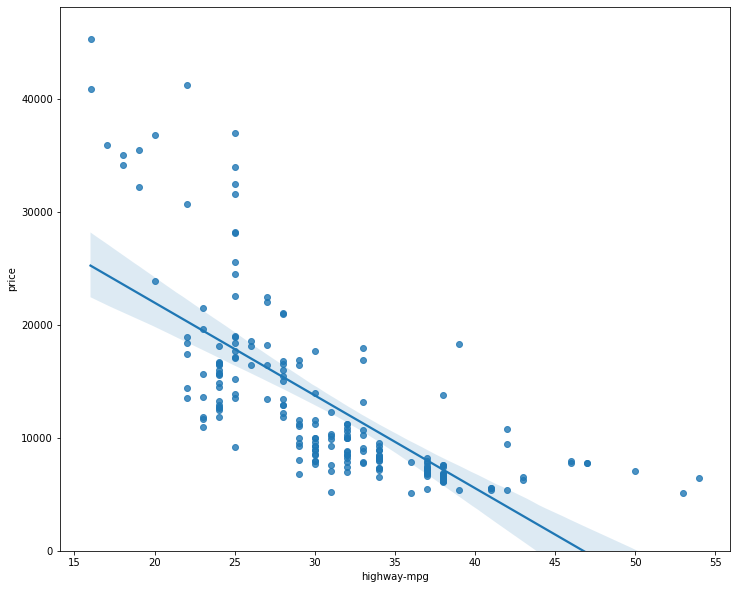

In [12]:
#   Create the scatterplot

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

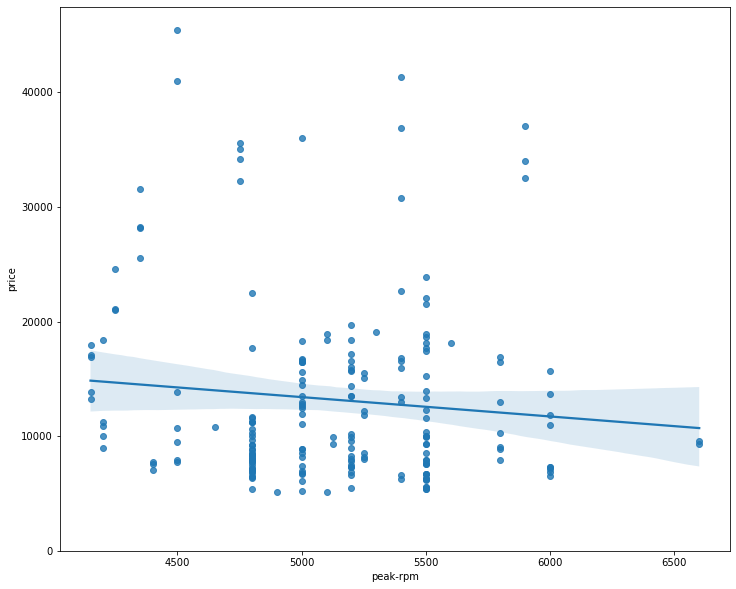

In [13]:
#   The scatterplot and regression line show that the highway-mpg variable is negatively corelated to the price (negative slope of regression line)
#   When looking at a regression plot pay attention to how scattered the data points are around the regression line. 
#   This gives a good indication of the variance of the data and whether a linear model would be the best fit or not.
#   If the data is too far off from the line, this linear model might not be the best model for this data.

#   Lets compare this to the regression plot of 'peak-rpm' with 'price'

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [14]:
#   The regression line for this chart is almost horizontal indicating the corelation is quite weak. 
#   Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. 
#   The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

#   We can check the actual corelation numbers using the corr() function

df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


In [15]:
#   Negative numbers indicate a negative corelation both for highway-mpg and peak-rpm.
#   The highway-mpg number (-0.7) shows stronger corelation to price compared to the corelation (-0.1) of peak-rpm to price.

### 4.b Evaluating the Models using Visualization (Residual Plot) 
            Used with Simple Linear Regression (single predictor)

A good way to visualize the variance of the data is to use a residual plot.   <br>
The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). <br>
When we look at a regression plot, the residual is the distance from the data point to the fitted regression line. <br>
A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals: <br>
If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. <br>
Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


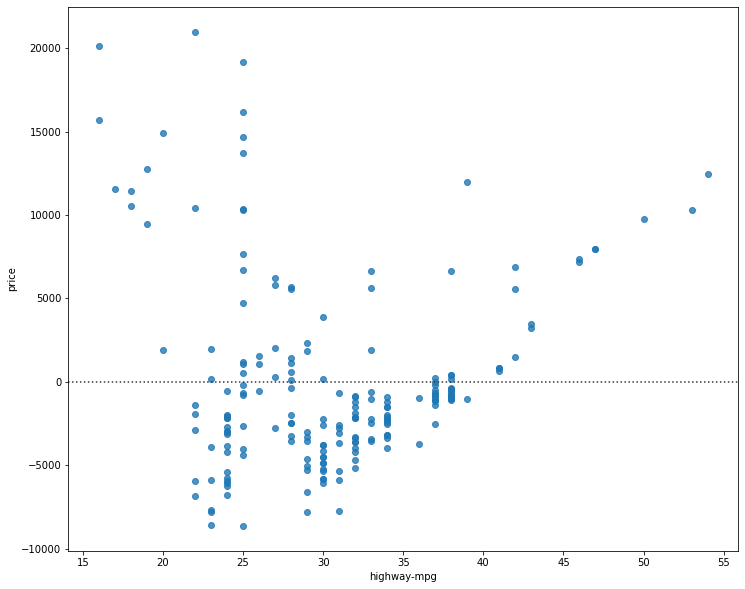

In [16]:
#   Creating a residual plot for highway-mpg variable

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [17]:
#   As can be seen here, the residuals are not randomly scattered around the x-axis, 
#   indicating that a non-linear model is probably required to characterize the highway-mpg variable

### 4.c Evaluating the Models using Visualization (Distribution Plot)
                Used with Multiple Linear Regression  (multiple predictor variables)

When it comes to Multiple linear regression, one way to look at the fit of the model is by looking at the distribution plot. <br>
We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [18]:
#   First, lets make a prediction for the 4 variables 

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
lm = LinearRegression()
lm = lm.fit(X,Y)

Yhat = lm.predict(X)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


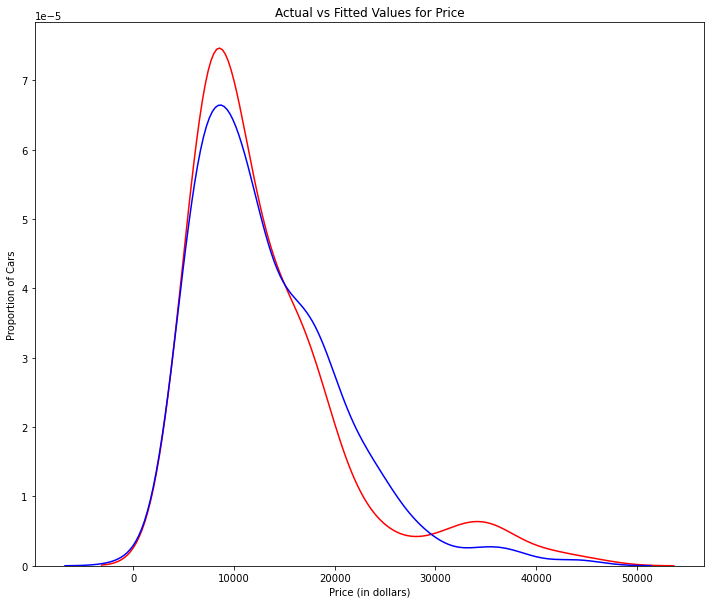

In [19]:
#   Create the Distribution plot

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [20]:
#   The distribution of the predicted values in blue match quite well with the actual values in red.
#   The MLR model is a better model to predict the car price.

### 5.a Polynomial Regression
                With a single variable X
We saw that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. <br>
Let's see if we can try fitting a polynomial model to the data instead.

<b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.<br>
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.<br>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>

$$
Yhat = a + b_1 X + b_2 X^2 
$$ 

<center><b>Cubic - 3rd Order</b></center>

$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>

$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [21]:
#  We define the following function to create the plot

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
#   We then define the variables

x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [23]:
#   Here we use a polynomial of the 3rd order (cubic) :  Yhat = a + b1(X) + b2(X^2) +b3(X^3)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [24]:
#   We can retrieve the coefficients

np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

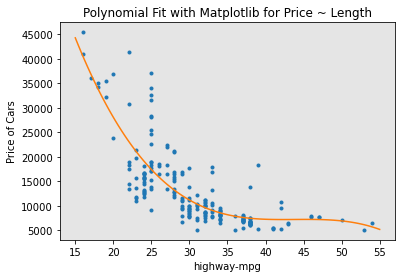

In [25]:
#   We can plot the polynomial model using the PlotPolly function created above

PlotPolly(p, x, y, 'highway-mpg')

In [26]:
#   The polynomial model fits the data much better than the SLR model created earlier.

### 5.b Polynomial Regression 
                With two variables X1 and X2  (multi-variate)

 The analytical expression for Multivariate Polynomial function gets complicated. <br>
 For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. 

In [27]:
#   First, we import the module

from sklearn.preprocessing import PolynomialFeatures

In [28]:
#   We create a PolynomialFeatures object of degree 2

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [29]:
#   We fit the multivariate polynomial model

X_pr=pr.fit_transform(X)

In [30]:
X.shape

(201, 4)

In [31]:
X_pr.shape

(201, 15)

In [32]:
#   As can be seen after transformation there are more features in the dataset

### 5.c Pipeline

Data Pipelines simplify the steps of processing the data. <br>

In [33]:
#   We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### To create a pipeline that standardizes the data, then produce a prediction using a simple linear regression model using the features X and target y,
we can use the following code

In [41]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(X,y)

ypipe=pipe.predict(X)
ypipe[0:10]

#   For detailed steps see below example:

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [34]:
#   We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [35]:
#   We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
#   First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
#   Then, we can normalize the data, perform a transform and fit the model simultaneously.
X = X.astype(float)
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [40]:
#   Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(X)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### 6. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.<br>
Two very important measures that are often used in Statistics to determine the accuracy of a model are:
<li>R^2 / R-squared
<li>Mean Squared Error (MSE)<p>

<b>R-squared</b><br>
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.<br>
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

<b>Mean Squared Error (MSE)</b><br>
The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).


####  Model 1: Simple Linear Regression

In [50]:
#   Lets calculate the R^2 for highway_mpg_fit
Xs = df[['highway-mpg']]
Ys = df['price']
lm.fit(Xs, Ys)
# Find the R^2
print('The R-square is: ', lm.score(Xs, Ys))

The R-square is:  0.4965911884339175


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [51]:
#   Let's calculate the MSE:
#   We can predict the output i.e., "Yhat" using the predict method, where Xs is the input variable:
Yhat=lm.predict(Xs)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [52]:
#   Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [53]:
#   We can compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


####  Model 2: Multiple Linear Regression

In [54]:
#   Lets calculate the R^2 for 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'
Xm = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Ym = df['price']
lm.fit(Xm, Ym)
# Find the R^2
print('The R-square is: ', lm.score(Xm, Ym))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [48]:
#   Let's calculate the MSE.
#   We produce a prediction:
Y_predict_multifit = lm.predict(Xm)

In [49]:
#   We compare the predicted results with the actual results:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Model 3: Polynomial fit

In [55]:
#   Let's calculate the R^2.
#   Let’s import the function r2_score from the module metrics as we are using a different function.
from sklearn.metrics import r2_score

In [56]:
#   We apply the function to get the value of R^2:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [57]:
#   We can also calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361218

### 7. Prediction 
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. <br>
Lets import pyplot for plotting; we will also be using some functions from numpy.

In [58]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [59]:
#   Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [64]:
#   Fit the model
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)
lm

LinearRegression()

In [65]:
#   Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

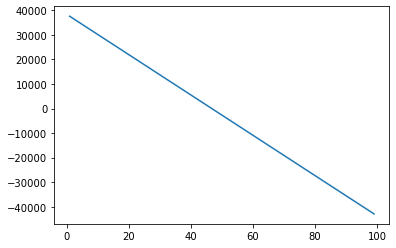

In [66]:
plt.plot(new_input, yhat)
plt.show()

### Decision making

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

When comparing models, the model with the higher R-squared value is a better fit for the data.

When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
    <li>R-squared: 0.49659118843391759
    <li>MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
    <li>R-squared: 0.80896354913783497
    <li>MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
    <li>R-squared: 0.6741946663906514
    <li>MSE: 2.05 x 10^7


### Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. <br>This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.
